<a href="https://colab.research.google.com/github/nanditacts/python-code/blob/main/Copy_of_l01c01_introduction_to_colab_and_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Saving heart.csv to heart (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Percentage of Patients Have Heart Disease: 54.46%
Percentage of Patients Haven't Heart Disease: 45.54%
(242, 21) (61, 21)
(242,) (61,)
Accuracy for decidion tree Training : 100.0 Percen

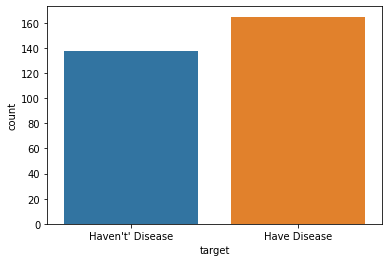

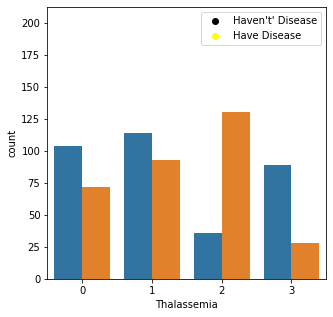

In [8]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
df.head()

df.shape

df.info()
df.describe()

df.isnull().sum()

sns.countplot(data=df,x='target')
plt.xticks(ticks=[0,1],labels=["Haven't' Disease", 'Have Disease'])


num_have_disease = len(df[df['target']==1])
num_havenot_disease = len(df[df['target']==0])
percent_have_disease = (num_have_disease/len(df))*100
percent_havenot_disease = (num_havenot_disease/len(df))*100
print("Percentage of Patients Have Heart Disease: {:.2f}%".format(percent_have_disease))
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format(percent_havenot_disease))


#plt.figure(figsize=(10,10))
#sns.heatmap(df.corr(),annot=True)

plt.figure(figsize=(5,5))
sns.countplot(data=df,x='sex',hue='target')
plt.xticks(ticks = [0,1], labels = ['Female','Male'])
plt.legend(["Haven't' Disease", 'Have Disease'])

plt.scatter(x=df.age[df.target == 0] , y=df.thalach[df.target == 0],c='black')
plt.scatter(x=df.age[df.target == 1] , y=df.thalach[df.target == 1],c='yellow')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(["Haven't' Disease", 'Have Disease'])


df['cp'].value_counts()

sns.countplot(data=df,x='cp',hue='target')
plt.xlabel('Chest Pain')
plt.legend(["Haven't' Disease", 'Have Disease'])


df.thal.value_counts()
sns.countplot(data=df,x='thal',hue='target')
plt.xlabel('Thalassemia')
plt.legend(["Haven't' Disease", 'Have Disease'])



cp = pd.get_dummies(df['cp'],prefix='cp')
thal = pd.get_dummies(df['thal'],prefix='thal')
slope = pd.get_dummies(df['slope'],prefix='slope')

lst = [df,cp,thal,slope]
df = pd.concat(lst,axis=1)
df.head()

df.shape
df.drop(columns=['cp','thal','slope'],axis=1,inplace=True)
df.shape

X = df.drop(['target'],axis=1)
y = df['target']
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
log_clf = LogisticRegression(solver='liblinear')
svm_clf = SVC()
tree_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=5)
rnd_clf = RandomForestClassifier(n_estimators=100)

#DEcision tree
tree_clf.fit(X_train,y_train)
accuracy_train = tree_clf.score(X_train, y_train)
print('Accuracy for decidion tree Training :',str(round(accuracy_train*100,2))+' Percentage')

y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for  decision tree Testing :',str(round(accuracy*100,2))+' Percentage')

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))


#KNN
knn_clf.fit(X_train,y_train)
accuracy_train = knn_clf.score(X_train, y_train)
print('Accuracy for Training :',str(round(accuracy_train*100,2))+' Percentage')

y_pred = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for Testing :',str(round(accuracy*100,2))+' Percentage')

#support vector machine 
svm_clf.fit(X_train,y_train)
accuracy_train = svm_clf.score(X_train, y_train)
print('Accuracy for Training :',str(round(accuracy_train*100,2))+' Percentage')

y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for Testing :',str(round(accuracy*100,2))+' Percentage')

#randon forest

rnd_clf.fit(X_train,y_train)
accuracy_train = rnd_clf.score(X_train, y_train)
print('Accuracy for random forest Training :',str(round(accuracy_train*100,2))+' Percentage')

y_pred = rnd_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for random forest Testing :',str(round(accuracy*100,2))+' Percentage')

#model = ['SVC','DecisionTreeClassifier','KNeighborsClassifier','RandomForestClassifier']
#accuracy = [70.49,81.97,68.85,88.52]

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))


#pd.df({'Name':model,'Accuracy':accuracy})

##### Copyright 2018 The TensorFlow Authors.

Saving heart.csv to heart (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Percentage of Patients Have Heart Disease: 54.46%
Percentage of Patients Haven't Heart Disease: 45.54%
(242, 21) (61, 21)
(242,) (61,)
Accuracy for SVM Training : 66.1157 Percentage
Acc

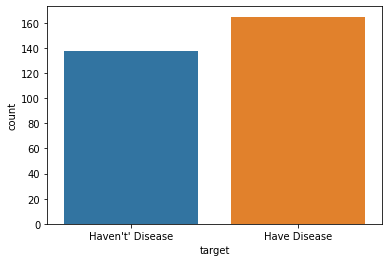

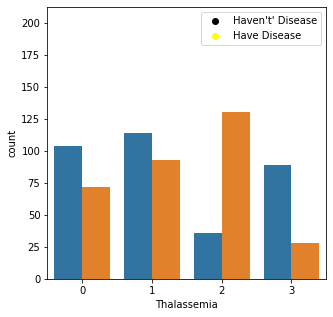

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
df.head()

df.shape

df.info()
df.describe()

df.isnull().sum()

sns.countplot(data=df,x='target')
plt.xticks(ticks=[0,1],labels=["Haven't' Disease", 'Have Disease'])


num_have_disease = len(df[df['target']==1])
num_havenot_disease = len(df[df['target']==0])
percent_have_disease = (num_have_disease/len(df))*100
percent_havenot_disease = (num_havenot_disease/len(df))*100
print("Percentage of Patients Have Heart Disease: {:.2f}%".format(percent_have_disease))
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format(percent_havenot_disease))


#plt.figure(figsize=(10,10))
#sns.heatmap(df.corr(),annot=True)

plt.figure(figsize=(5,5))
sns.countplot(data=df,x='sex',hue='target')
plt.xticks(ticks = [0,1], labels = ['Female','Male'])
plt.legend(["Haven't' Disease", 'Have Disease'])

plt.scatter(x=df.age[df.target == 0] , y=df.thalach[df.target == 0],c='black')
plt.scatter(x=df.age[df.target == 1] , y=df.thalach[df.target == 1],c='yellow')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(["Haven't' Disease", 'Have Disease'])


df['cp'].value_counts()

sns.countplot(data=df,x='cp',hue='target')
plt.xlabel('Chest Pain')
plt.legend(["Haven't' Disease", 'Have Disease'])


df.thal.value_counts()
sns.countplot(data=df,x='thal',hue='target')
plt.xlabel('Thalassemia')
plt.legend(["Haven't' Disease", 'Have Disease'])



cp = pd.get_dummies(df['cp'],prefix='cp')
thal = pd.get_dummies(df['thal'],prefix='thal')
slope = pd.get_dummies(df['slope'],prefix='slope')

lst = [df,cp,thal,slope]
df = pd.concat(lst,axis=1)
df.head()

df.shape
df.drop(columns=['cp','thal','slope'],axis=1,inplace=True)
df.shape

X = df.drop(['target'],axis=1)
y = df['target']
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
log_clf = LogisticRegression(solver='liblinear')
svm_clf = SVC()
tree_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=5)
rnd_clf = RandomForestClassifier(n_estimators=100)


#support vector machine 
svm_clf.fit(X_train,y_train)
accuracy_train = svm_clf.score(X_train, y_train)
print('Accuracy for SVM Training :',str(round(accuracy_train*100,4))+' Percentage')

y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for SVM Testing :',str(round(accuracy*100,4))+' Percentage')


#pd.df({'Name':model,'Accuracy':accuracy})

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_clf = SVC(kernel='linear')
#svm_clf.fit(x_train,y_train)
#y_pred = svm_clf.predict(x_test)
print(accuracy_score(y_test,y_pred))


from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))



# New Section

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['heart_chisquare.csv']))
df.head()

df.shape

df.describe()

X = df.drop(['target'],axis=1)
y = df['target']
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
log_clf = LogisticRegression(solver='liblinear')
svm_clf = SVC()


#support vector machine 
#svm_clf.fit(X_train,y_train)
#accuracy_train = svm_clf.score(X_train, y_train)
#print('Accuracy for SVM Training :',str(round(accuracy_train*100,4))+' Percentage')

#y_pred = svm_clf.predict(X_test)
#accuracy = accuracy_score(y_test,y_pred)
#print('Accuracy for SVM Testing :',str(round(accuracy*100,4))+' Percentage')


#pd.df({'Name':model,'Accuracy':accuracy})

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_clf = SVC(kernel='linear', gamma='auto', C=2)
#svm_clf.fit(x_train,y_train)
#y_pred = svm_clf.predict(x_test)
#print(accuracy_score(y_test,y_pred))
svm_clf.fit(X_train,y_train)
accuracy_train = svm_clf.score(X_train, y_train)
print('Accuracy for SVM linear Training :',str(round(accuracy_train*100,4))+' Percentage')

y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for SVM linear Testing :',str(round(accuracy*100,4))+' Percentage')

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))









#contingency_table=pd.crosstab(df["age"],df["target"])
#print('contingency_table :-\n',contingency_table)

#Observed_Values = contingency_table.values 
#print("Observed Values :-\n",Observed_Values)

#import scipy.stats
#b=scipy.stats.chi2_contingency(contingency_table)
#Expected_Values = b[3]
#print("Expected Values :-\n",Expected_Values)

#no_of_rows=len(contingency_table.iloc[0:2,0])
#no_of_columns=len(contingency_table.iloc[0,0:2])
#df=(no_of_rows-1)*(no_of_columns-1)
#print("Degree of Freedom:-",df)

#alpha=0.05

#from scipy.stats import chi2
#chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
#chi_square_statistic=chi_square[0]+chi_square[1]
#print("chi-square statistic:-",chi_square_statistic)


Saving heart_chisquare.csv to heart_chisquare.csv
(242, 11) (61, 11)
(242,) (61,)
Accuracy for SVM linear Training : 85.5372 Percentage
Accuracy for SVM linear Testing : 88.5246 Percentage
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['heart_modified.csv']))
df.head()


Saving heart_modified.csv to heart_modified (2).csv


,age,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,3,145,233,0,150,0,2.3,0,0,1,1
1,37,2,130,250,1,187,0,3.5,0,0,2,1
2,41,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,120,354,1,163,1,0.6,2,0,2,1


# New Section

Saving heart.csv to heart (8).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Percentage of Patients Have Heart Disease: 54.46%
Percentage of Patients Haven't Heart Disease: 45.54%
(242, 21) (61, 21)
(242,) (61,)
Accuracy for SVM Training : 66.1157 Percentage
Acc

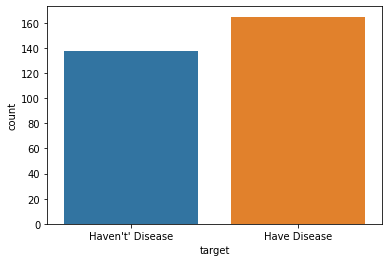

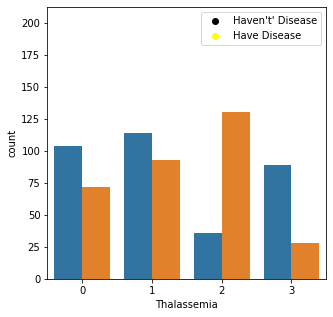

In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
df.head()

df.shape

df.info()
df.describe()

df.isnull().sum()

sns.countplot(data=df,x='target')
plt.xticks(ticks=[0,1],labels=["Haven't' Disease", 'Have Disease'])


num_have_disease = len(df[df['target']==1])
num_havenot_disease = len(df[df['target']==0])
percent_have_disease = (num_have_disease/len(df))*100
percent_havenot_disease = (num_havenot_disease/len(df))*100
print("Percentage of Patients Have Heart Disease: {:.2f}%".format(percent_have_disease))
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format(percent_havenot_disease))


#plt.figure(figsize=(10,10))
#sns.heatmap(df.corr(),annot=True)

plt.figure(figsize=(5,5))
sns.countplot(data=df,x='sex',hue='target')
plt.xticks(ticks = [0,1], labels = ['Female','Male'])
plt.legend(["Haven't' Disease", 'Have Disease'])

plt.scatter(x=df.age[df.target == 0] , y=df.thalach[df.target == 0],c='black')
plt.scatter(x=df.age[df.target == 1] , y=df.thalach[df.target == 1],c='yellow')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(["Haven't' Disease", 'Have Disease'])


df['cp'].value_counts()

sns.countplot(data=df,x='cp',hue='target')
plt.xlabel('Chest Pain')
plt.legend(["Haven't' Disease", 'Have Disease'])


df.thal.value_counts()
sns.countplot(data=df,x='thal',hue='target')
plt.xlabel('Thalassemia')
plt.legend(["Haven't' Disease", 'Have Disease'])



cp = pd.get_dummies(df['cp'],prefix='cp')
thal = pd.get_dummies(df['thal'],prefix='thal')
slope = pd.get_dummies(df['slope'],prefix='slope')

lst = [df,cp,thal,slope]
df = pd.concat(lst,axis=1)
df.head()

df.shape
df.drop(columns=['cp','thal','slope'],axis=1,inplace=True)
df.shape

X = df.drop(['target'],axis=1)
y = df['target']
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
log_clf = LogisticRegression(solver='liblinear')
svm_clf = SVC()
tree_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=5)
rnd_clf = RandomForestClassifier(n_estimators=100)


#support vector machine 
svm_clf.fit(X_train,y_train)
accuracy_train = svm_clf.score(X_train, y_train)
print('Accuracy for SVM Training :',str(round(accuracy_train*100,4))+' Percentage')

y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for SVM Testing :',str(round(accuracy*100,4))+' Percentage')


#pd.df({'Name':model,'Accuracy':accuracy})

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_clf = SVC(kernel='linear', gamma='auto', C=2)
#svm_clf.fit(x_train,y_train)
#y_pred = svm_clf.predict(x_test)
#print(accuracy_score(y_test,y_pred))
svm_clf.fit(X_train,y_train)
accuracy_train = svm_clf.score(X_train, y_train)
print('Accuracy for SVM linear Training :',str(round(accuracy_train*100,4))+' Percentage')

y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for SVM linear Testing :',str(round(accuracy*100,4))+' Percentage')

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

#from sklearn.svm import SVC
svm_clf = SVC(kernel='poly', degree=1)
svm_clf.fit(X_train, y_train)

accuracy_train = svm_clf.score(X_train, y_train)
print('Accuracy for SVM poly 1 Training :',str(round(accuracy_train*100,4))+' Percentage')

y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for SVM poly 1 Testing :',str(round(accuracy*100,4))+' Percentage')

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)

accuracy_train = svm_clf.score(X_train, y_train)
print('Accuracy for SVM  rbf Training :',str(round(accuracy_train*100,4))+' Percentage')

y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for SVM rbf Testing :',str(round(accuracy*100,4))+' Percentage')

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

svm_clf = SVC(kernel='poly', degree=2)
svm_clf.fit(X_train, y_train)

accuracy_train = svm_clf.score(X_train, y_train)
print('Accuracy for SVM poly 2 Training :',str(round(accuracy_train*100,4))+' Percentage')

y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for SVM poly 2 Testing :',str(round(accuracy*100,4))+' Percentage')

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

svm_clf = SVC(kernel='poly', degree=3)
svm_clf.fit(X_train, y_train)

accuracy_train = svm_clf.score(X_train, y_train)
print('Accuracy for SVM poly 3 Training :',str(round(accuracy_train*100,4))+' Percentage')

y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for SVM poly 3 Testing :',str(round(accuracy*100,4))+' Percentage')


from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))



# New Section

## **Introduction to Colab and Python**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Welcome to this Colab where you will get a quick introduction to the Python programming language and the environment used for the course's exercises: Colab.

Colab is a Python development environment that runs in the browser using Google Cloud.

For example, to print "Hello World", just hover the mouse over [ ] and press the play button to the upper left. Or press shift-enter to execute.

In [ ]:
print("Hello World")

## Functions, Conditionals, and Iteration
Let's create a Python function, and call it from a loop.

In [ ]:
def HelloWorldXY(x, y):
  if (x < 10):
    print("Hello World, x was < 10")
  elif (x < 20):
    print("Hello World, x was >= 10 but < 20")
  else:
    print("Hello World, x was >= 20")
  return x + y

for i in range(8, 25, 5):  # i=8, 13, 18, 23 (start, stop, step)
  print("--- Now running with i: {}".format(i))
  r = HelloWorldXY(i,i)
  print("Result from HelloWorld: {}".format(r))

In [ ]:
print(HelloWorldXY(1,2))

Easy, right?

If you want a loop starting at 0 to 2 (exclusive) you could do any of the following

In [ ]:
print("Iterate over the items. `range(2)` is like a list [0,1].")
for i in range(2):
  print(i)

print("Iterate over an actual list.")
for i in [0,1]:
  print(i)

print("While works")
i = 0
while i < 2:
  print(i)
  i += 1

In [ ]:
print("Python supports standard key words like continue and break")
while True:
  print("Entered while")
  break

## Numpy and lists
Python has lists built into the language.
However, we will use a library called numpy for this.
Numpy gives you lots of support functions that are useful when doing Machine Learning.

Here, you will also see an import statement. This statement makes the entire numpy package available and we can access those symbols using the abbreviated 'np' syntax.

In [ ]:
import numpy as np  # Make numpy available using np.

# Create a numpy array, and append an element
a = np.array(["Hello", "World"])
a = np.append(a, "!")
print("Current array: {}".format(a))
print("Printing each element")
for i in a:
  print(i)

print("\nPrinting each element and their index")
for i,e in enumerate(a):
  print("Index: {}, was: {}".format(i, e))

In [ ]:
print("\nShowing some basic math on arrays")
b = np.array([0,1,4,3,2])
print("Max: {}".format(np.max(b)))
print("Average: {}".format(np.average(b)))
print("Max index: {}".format(np.argmax(b)))

In [ ]:
print("\nYou can print the type of anything")
print("Type of b: {}, type of b[0]: {}".format(type(b), type(b[0])))

In [ ]:
print("\nUse numpy to create a [3,3] dimension array with random number")
c = np.random.rand(3, 3)
print(c)

In [ ]:
print("\nYou can print the dimensions of arrays")
print("Shape of a: {}".format(a.shape))
print("Shape of b: {}".format(b.shape))
print("Shape of c: {}".format(c.shape))
print("...Observe, Python uses both [0,1,2] and (0,1,2) to specify lists")

## Colab Specifics

Colab is a virtual machine you can access directly. To run commands at the VM's terminal, prefix the line with an exclamation point (!).


In [ ]:
print("\nDoing $ls on filesystem")
!ls -l
!pwd

In [ ]:
print("Install numpy")  # Just for test, numpy is actually preinstalled in all Colab instances
!pip install numpy

**Exercise**

Create a code cell underneath this text cell and add code to:


*   List the path of the current directory (pwd)
* Go to / (cd) and list the content (ls -l)

In [ ]:
!pwd
!cd /
!ls -l
print("Hello")

All usage of Colab in this course is completely free or charge. Even GPU usage is provided free of charge for some hours of usage every day.

**Using GPUs**
* Many of the exercises in the course executes more quickly by using GPU runtime: Runtime | Change runtime type | Hardware accelerator | GPU

**Some final words on Colab**
*   You execute each cell in order, you can edit & re-execute cells if you want
*   Sometimes, this could have unintended consequences. For example, if you add a dimension to an array and execute the cell multiple times, then the cells after may not work. If you encounter problem reset your environment:
  *   Runtime -> Restart runtime... Resets your Python shell
  *   Runtime -> Restart all runtimes... Will reset the Colab image, and get you back to a 100% clean environment
* You can also clear the output in the Colab by doing: Edit -> Clear all outputs
* Colabs in this course are loaded from GitHub. Save to your Google Drive if you want a copy with your code/output: File -> Save a copy in Drive...

**Learn More**
*   Check out [this](https://www.youtube.com/watch?v=inN8seMm7UI&list=PLQY2H8rRoyvwLbzbnKJ59NkZvQAW9wLbx&index=3) episode of #CodingTensorFlow, and don't forget to subscribe to the YouTube channel ;)
